Image Classifier


Load Data

In [ ]:
import pandas as pd
import numpy as np

data_train_df = pd.read_csv('/content/train.csv')
data_test_df = pd.read_csv('/content/test_input.csv')
data_train_df.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v776,v777,v778,v779,v780,v781,v782,v783,v784,label
0,0,0,0,0,0,1,0,0,131,184,...,143,106,0,0,0,0,0,0,0,2
1,1,0,0,0,0,0,0,0,0,27,...,190,178,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,1,0,0,0,1,1,...,1,0,9,66,61,0,0,0,0,4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
data_test_df.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v775,v776,v777,v778,v779,v780,v781,v782,v783,v784
0,0,0,0,0,0,0,0,0,0,0,...,88,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,17,...,124,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,35,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,9,75,...,74,53,19,0,1,0,0,0,0,0
4,4,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0


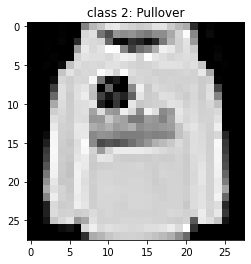

In [ ]:
# turn pd datafram into numpy array
X_train = data_train_df.loc[:, "v1":"v784"].to_numpy()
y_train = data_train_df.label.loc[:, ].to_numpy()

X_test = data_test_df.loc[:, "v1":"v784"].to_numpy()

import matplotlib.pyplot as plt
import seaborn as sns

sample = X_train.reshape((X_train.shape[0], 28, 28))
plt.imshow(sample[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(y_train[0]) + ": Pullover" )
plt.show()

The code clearly show :
1. Pre-process data
2. Details of your implementation for each algorithm
3. Fine-tune hyper-parameters for each algorithm and running time
4. The comparison result between 4 different algorithms including 3 single methods and one ensemble method
5. Hardware and software specifications of the computer that you used for performance evaluation

Part 1. Pre-process data

In [ ]:
#Normalisation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

X_train.shape
X_train_normalized.shape


(30000, 784)

Part 2. Models implementation and hyperparameter tuning

In [ ]:
#Import library
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#2.1 Naive Bayes
nb = GaussianNB()
nb_param_grid = {'var_smoothing':[1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
nb_grid_search = GridSearchCV(nb, nb_param_grid, cv=5)
nb_grid_search.fit(X_train_normalized, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]})

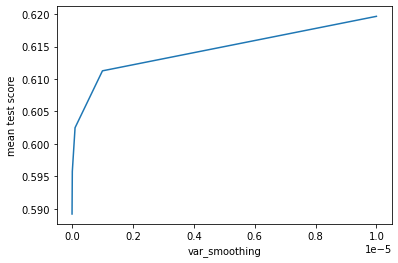

In [ ]:
# convert param_var_smoothing column to numeric type
nb_results = pd.DataFrame(nb_grid_search.cv_results_)
nb_results['param_var_smoothing'] = pd.to_numeric(nb_results['param_var_smoothing'])

# plot performance vs var_smoothing
plt.plot(nb_results['param_var_smoothing'], nb_results['mean_test_score'])
plt.xlabel('var_smoothing')
plt.ylabel('mean test score')
plt.show()

In [ ]:
nb_best_param = nb_grid_search.best_params_
best_nb = nb_grid_search.best_estimator_
print(f'Naive Bayes Best Parameters: {nb_best_param}')

Naive Bayes Best Parameters: {'var_smoothing': 1e-05}


In [ ]:
#2.2 Logistic Regression
lr = LogisticRegression()
lr_param_grid = {'penalty': ['l1', 'l2'], 'C': [ 0.01, 0.1, 1, 10]}
lr_grid_search = GridSearchCV(lr, lr_param_grid, cv = 5)
lr_grid_search.fit(X_train_normalized, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [ ]:
lr_cv_results = pd.DataFrame(lr_grid_search.cv_results_)
lr_cv_results = lr_cv_results[['param_penalty', 'param_C', 'mean_test_score', 'rank_test_score']]
lr_cv_results = lr_cv_results.sort_values(by=['rank_test_score'])

print(lr_cv_results.to_string(index=False))

param_penalty param_C  mean_test_score  rank_test_score
           l2     0.1         0.850367                1
           l2       1         0.849333                2
           l2      10         0.848500                3
           l2    0.01         0.841100                4
           l1    0.01              NaN                5
           l1     0.1              NaN                5
           l1       1              NaN                5
           l1      10              NaN                5


In [ ]:
lr_best_param = lr_grid_search.best_params_
best_lr = lr_grid_search.best_estimator_
print(f'Logistic Regression Best Parameters: {lr_best_param}')

Logistic Regression Best Parameters: {'C': 0.1, 'penalty': 'l2'}


In [ ]:
#2.3 decision tree
dt = DecisionTreeClassifier()
dt_param_grid = {'max_depth': [10,20,30], 'min_samples_leaf': [5, 10, 15]}
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5)
dt_grid_search.fit(X_train_normalized, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [5, 10, 15]})

In [ ]:
dt_cv_results = pd.DataFrame(dt_grid_search.cv_results_)
dt_cv_results = dt_cv_results[['param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'rank_test_score']]
dt_cv_results = dt_cv_results.sort_values(by=['rank_test_score'])

print(dt_cv_results.to_string(index=False))

param_max_depth param_min_samples_leaf  mean_test_score  rank_test_score
             10                      5         0.794033                1
             30                     15         0.793067                2
             20                     15         0.792667                3
             10                     10         0.792433                4
             10                     15         0.791333                5
             20                     10         0.790700                6
             30                     10         0.790267                7
             30                      5         0.787967                8
             20                      5         0.786967                9


In [ ]:
dt_best_param = dt_grid_search.best_params_
best_dt = dt_grid_search.best_estimator_
print(f'Decision Tree Best Parameters: {dt_best_param}')

Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5}


In [ ]:
#2.4 Random Forest
rf = RandomForestClassifier(random_state = 42)
rf_param_grid = {'n_estimators': [50,100,200], 'max_depth': [10,20,30]}
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5)
rf_grid_search.fit(X_train_normalized, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 200]})

In [ ]:
rf_cv_results = pd.DataFrame(rf_grid_search.cv_results_)
rf_cv_results = rf_cv_results[['param_n_estimators', 'param_max_depth', 'mean_test_score', 'rank_test_score']]
rf_cv_results = rf_cv_results.sort_values(by=['rank_test_score'])

print(rf_cv_results.to_string(index=False))

param_n_estimators param_max_depth  mean_test_score  rank_test_score
               200              20         0.875033                1
               200              30         0.874400                2
               100              20         0.873467                3
               100              30         0.871967                4
                50              20         0.870267                5
                50              30         0.869767                6
               200              10         0.850100                7
               100              10         0.849533                8
                50              10         0.848500                9


In [ ]:
rf_best_param = rf_grid_search.best_params_
best_rf = rf_grid_search.best_estimator_
print(f'Random Forests Best Parameters: {rf_best_param}')

Random Forests Best Parameters: {'max_depth': 20, 'n_estimators': 200}


Part 3. Model comparison using their own best hyper-parameters

In [ ]:
from time import time
from sklearn.model_selection import train_test_split
X_train_split, X_valid, y_train_split, y_valid = train_test_split (X_train_normalized, y_train, test_size = 0.7)

In [ ]:
#3.1 Naive Bayes
start_nb = time()
best_nb.fit(X_train_split, y_train_split)
print ('Best Naive Bayes\nAccuracy: %.2f%%\ttime: %.2fs' % (best_nb.score(X_valid, y_valid)*100, time()-start_nb))

#3.2 Logistic Regression
start_lr = time()
best_lr.fit(X_train_split, y_train_split)
print ('Best Logistic Regression\nAccuracy: %.2f%%\ttime: %.2fs' % (best_lr.score(X_valid, y_valid)*100, time()-start_lr))

#3.3 Decision Tree
start_dt = time()
best_dt.fit(X_train_split, y_train_split)
print ('Best Decision Tree\nAccuracy: %.2f%%\ttime: %.2fs' % (best_dt.score(X_valid, y_valid)*100, time()-start_dt))

#3.4 Random Forests
start_rf = time()
best_rf.fit(X_train_split, y_train_split)
print ('Best Random Forests\nAccuracy: %.2f%%\ttime: %.2fs' % (best_rf.score(X_valid, y_valid)*100, time()-start_rf))


Best Naive Bayes
Accuracy: 60.63%	time: 1.31s
Best Logistic Regression
Accuracy: 84.46%	time: 6.99s
Best Decision Tree
Accuracy: 77.80%	time: 3.11s
Best Random Forests
Accuracy: 85.84%	time: 25.73s


Part 4. Output

In [ ]:
best_model = RandomForestClassifier(max_depth = 20, n_estimators = 200, random_state = 42)
best_model.fit(X_train_normalized, y_train)
output = best_model.predict(X_test_normalized)
output

array([1, 1, 1, ..., 5, 0, 2])

In [ ]:
# assume output is the predicted labels from classifiers using input as data from test_input.csv
# (5000,)
output_df = pd.DataFrame(output, columns = ['label'])
output_df.to_csv('/content/test_output.csv', sep=",", float_format='%d', index_label="id")

In [ ]:
df = pd.read_csv('/content/test_output.csv')
df.head()

,id,label
0,0,1
1,1,1
2,2,1
3,3,0
4,4,3


Part 5. Hardware and Software bold text

In [ ]:
!cat /proc/cpuinfo


processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
!python --version
!pip freeze


Python 3.9.16
absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.15.1
astropy==5.2.1
astunparse==1.6.3
atomicwrites==1.4.1
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
bokeh==2.4.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==3.0.4
charset-normalizer==2.0.12
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.0.5
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
distributed==2022.12.1
dlib==19.24.0
dm-tree==0.1.8
docutils==0.16
dopamin